# 워드클라우드(한글로)

In [2]:
textfile = 'data/gift.txt'
maskfile = 'data/heart.jpg'

## 한글 텍스트 전처리

In [4]:
with open(textfile, encoding='UTF-8') as fp:
    text = fp.read()

In [6]:
from konlpy.tag import Okt
okt = Okt()

In [12]:
tokens = okt.nouns(text) #명사 뺴온다

In [13]:
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [9]:
# 영문자, 숫자제거
import re

new_tokens =[]
for token in tokens:
    gift = re.sub('[a-zA-Z0-9]','',token) #\w
    if gift:
        new_tokens.append(gift)

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [15]:
import nltk

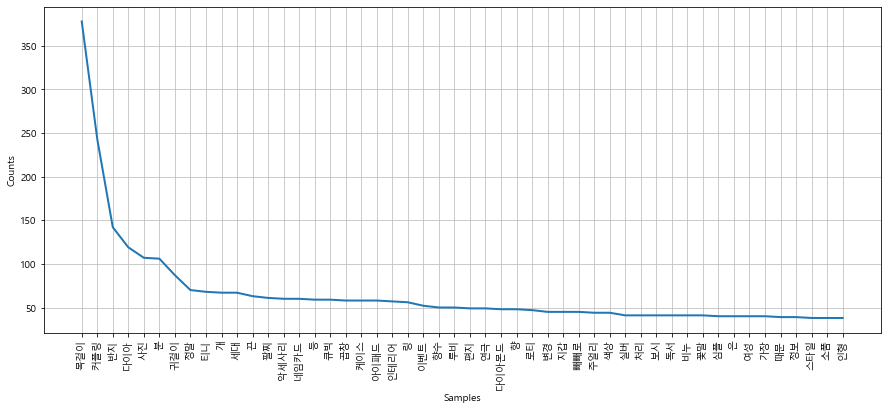

In [25]:

gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [24]:
stoptext = """
선물 추천 것 가격 수 기능 제품 저 제 생각 여자 여자친구 사용 요 더 꽃 구매 고급
판매 때 참고 머리 하나 해 한번 제작 용 준 디자인 네이버 사람 거 배송 중 후기 감동
하트 여친 커플 가능 사랑 인기 상품 직접 브랜드 선택 곳 모양 마감 요즘 오늘 가지
남녀 그냥 위 페이 마음 부담 노늘 남자 협찬 전 핸드 의미 도움 섹상 아래 포장 처 조금
하루 정도  
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['반지', '목걸이', '가디건', '모자', '신지', '몇개', '투척', '클래식', '커플룩', '버핏']

## 워드클라우드 그리기

In [27]:
from wordcloud import WordCloud
from PIL import Image

In [39]:
data = gift.vocab().most_common(300)

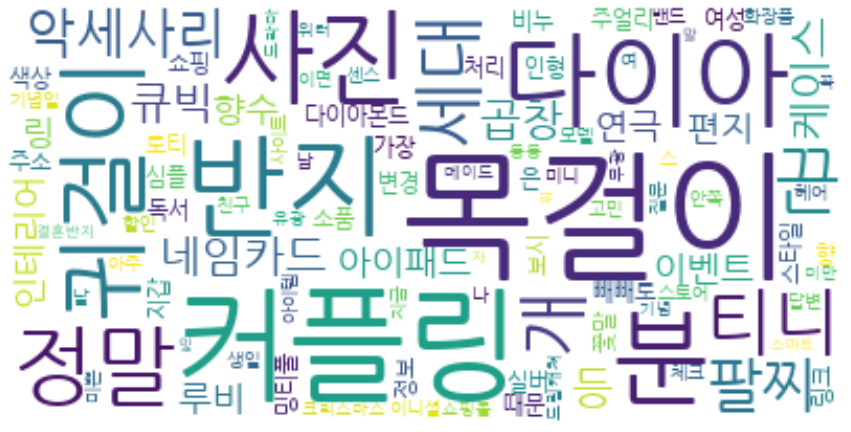

In [41]:
wc = WordCloud(background_color= 'white',
                        max_words= 100,
                        relative_scaling= 0.3,
                        font_path= 'data/NanumGothic.ttf'
                        ).generate_from_frequencies(dict(data))

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [42]:
mask = np.array(Image.open(maskfile))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)
wc = WordCloud(background_color= 'white',mask=mask, min_font_size=1,max_font_size=120,
                        max_words= 100,
                        relative_scaling= 0.3,
                        font_path= 'data/NanumGothic.ttf'
                        ).generate_from_frequencies(dict(data))




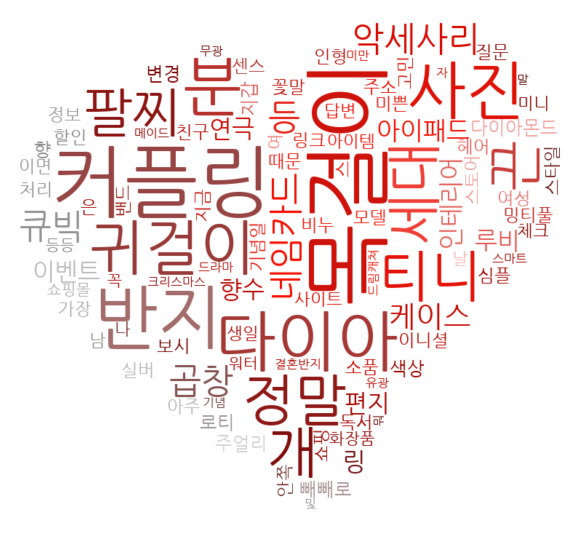

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()